## **Lasso와 Ridge Regression**

>> ### **고차 다항식 형태의 데이터를 Lasso와 Ridge로 조정하여 fitting 하기**
- https://en.wikipedia.org/wiki/Polynomial_regression (F12 search & copy)
$$
{\displaystyle y=\beta _{0}+\beta _{1}x+\beta _{2}x^{2}+\beta _{3}x^{3}+\cdots +\beta _{n}x^{n}+\varepsilon .\,}
$$

In [ ]:
# @title
import numpy as np
rng = np.random.RandomState(1234)
X = 10 * rng.rand(100); print(f'X.shape: {X.shape}')
y = np.cos(X) + 0.25 * rng.randn(100)
X = X.reshape(-1,1); print(f'X.reshape(-1,1): {X.shape}') # X = X[:,np.newaxis]

X.shape: (100,)
X.reshape(-1,1): (100, 1)


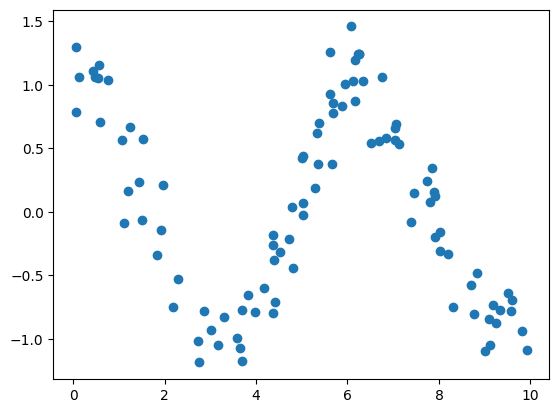

In [ ]:
# @title
import matplotlib.pyplot as plt
plt.scatter(X, y)

### **5차 다항함수 예를 들고 이해하기**

In [ ]:
# @title
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(5, include_bias=False)
poly.fit_transform(x[:, None])

array([[   2.,    4.,    8.,   16.,   32.],
       [   3.,    9.,   27.,   81.,  243.],
       [   4.,   16.,   64.,  256., 1024.]])

In [ ]:
# @title
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

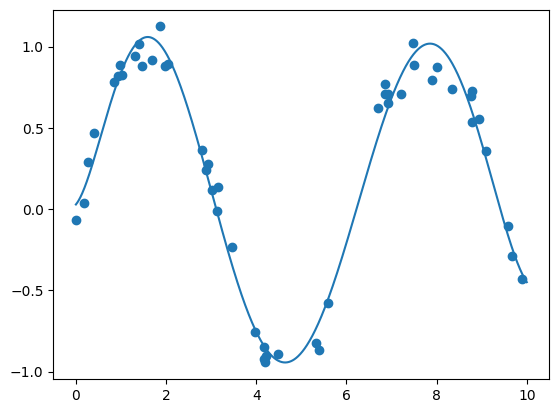

In [ ]:
# @title
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit = np.linspace(0, 10, 1000)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

### **이해 끝**

In [ ]:
# @title
rng = np.random.RandomState(1234)
X = 10 * rng.rand(100); print(f'X.shape: {X.shape}')
y = np.cos(X) + 0.25 * rng.randn(100)

X.shape: (100,)


In [ ]:
# @title
X = X.reshape(-1,1)

In [ ]:
# @title
from sklearn.linear_model import LinearRegression
y_predict = LinearRegression().fit(X,y).predict(X)

In [ ]:
# @title
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
Xfit = np.linspace(0, 10, 100)[:,np.newaxis]
poly_model = make_pipeline(PolynomialFeatures(20), LinearRegression())
yfit = poly_model.fit(X, y).predict(Xfit)

In [ ]:
# @title
from sklearn.linear_model import Ridge, Lasso
lasso_model = make_pipeline(PolynomialFeatures(20), Lasso(alpha= 1))
predict_lasso = lasso_model.fit(X, y).predict(Xfit)

ridge_model = make_pipeline(PolynomialFeatures(20), Ridge(alpha= 30))
predict_ridge = ridge_model.fit(X, y).predict(Xfit)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.848e+01, tolerance: 5.723e-03
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# @title
X.shape

(100, 1)

In [ ]:
# @title
y.shape

(100,)

(-4.0, 4.0)

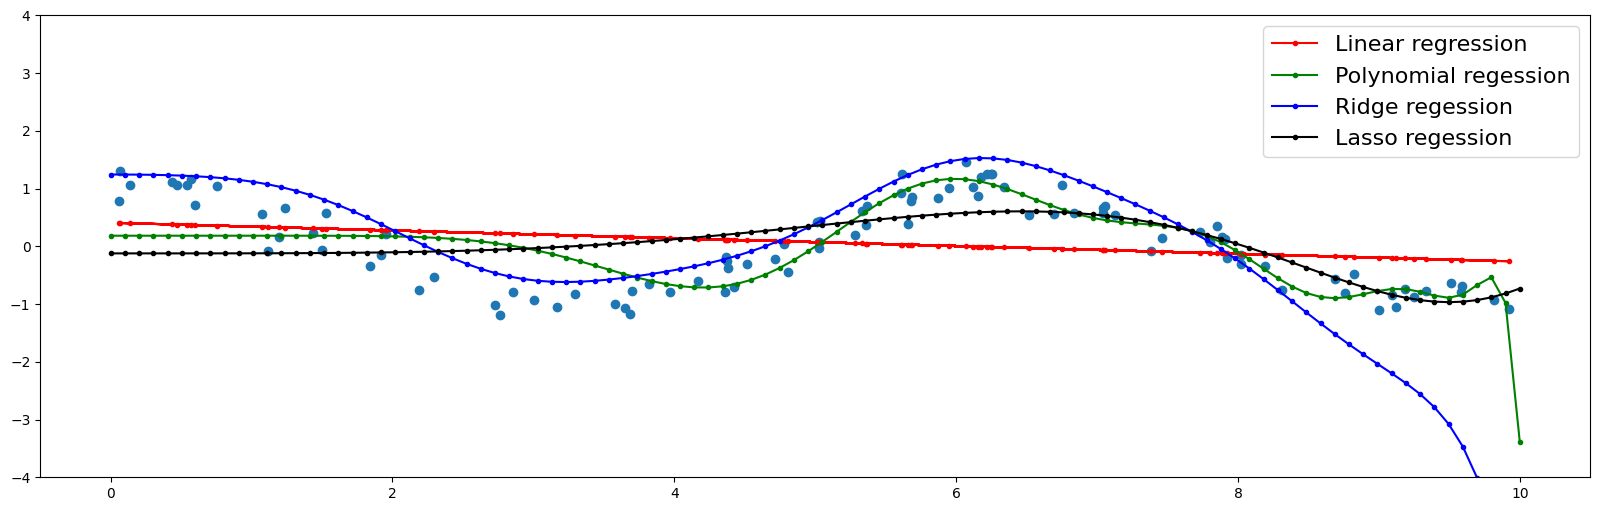

In [ ]:
# @title
plt.figure(figsize=(20, 6)); plt.rc('legend', fontsize=16)
plt.scatter(X, y)
plt.plot(X, y_predict, 'r.-', label='Linear regression'); plt.legend()
plt.plot(Xfit, yfit, 'g.-', label='Polynomial regession'); plt.legend()
plt.plot(Xfit, predict_ridge, 'b.-', label='Ridge regession'); plt.legend()
plt.plot(Xfit, predict_lasso, 'k.-', label='Lasso regession'); plt.legend()
plt.ylim(-4, 4)

In [ ]:
# @title
from sklearn.metrics import mean_squared_error
print(f'단순선형 : MSE: {mean_squared_error(y, y_predict)}')
print(f'다항회귀 : MSE: {mean_squared_error(y, yfit)}')
print(f'Lasso : MSE: {mean_squared_error(y, predict_lasso)}')
print(f'Ridge : MSE: {mean_squared_error(y, predict_ridge)}')

단순선형 : MSE: 0.5376776034498592
다항회귀 : MSE: 1.1631137477484383
Lasso : MSE: 0.7724246316074697
Ridge : MSE: 3.2735775863254175



##  **Question 1:  예측모형의 목적이 무엇인가?**
##  **Question 2: 과거 데이터를 바탕으로 새로운 데이터를 가장 정확하게 예측하는 모델**
>> ### **교차검증(Cross validation) 필요**



In [ ]:
# @title


In [ ]:
# @title
